<a href="https://www.kaggle.com/code/aleksandrmorozov123/h-m-personalized-fashion-recommendations?scriptVersionId=93269383" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**First, read the data files**

In [2]:
# import useful libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set (color_codes=True)

# read the data set of articles
dataA = pd.read_csv ('../input/h-and-m-personalized-fashion-recommendations/articles.csv')

# printing the data
dataA.head (10)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
5,110065011,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,12,Light Beige,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
6,111565001,111565,20 den 1p Stockings,304,Underwear Tights,Socks & Tights,1010016,Solid,9,Black,...,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,"Semi shiny nylon stockings with a wide, reinfo..."
7,111565003,111565,20 den 1p Stockings,302,Socks,Socks & Tights,1010016,Solid,13,Beige,...,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,"Semi shiny nylon stockings with a wide, reinfo..."
8,111586001,111586,Shape Up 30 den 1p Tights,273,Leggings/Tights,Garment Lower body,1010016,Solid,9,Black,...,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,Tights with built-in support to lift the botto...
9,111593001,111593,Support 40 den 1p Tights,304,Underwear Tights,Socks & Tights,1010016,Solid,9,Black,...,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,"Semi shiny tights that shape the tummy, thighs..."


**Checking the missing values**

In [3]:
# checking the missing values
dataA.isnull ().sum ()

article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_group_no                  0
garment_group_name                0
detail_desc                     416
dtype: int64

In [4]:
# Dropping the missing values
dataA = dataA.dropna ()
dataA.count ()

article_id                      105126
product_code                    105126
prod_name                       105126
product_type_no                 105126
product_type_name               105126
product_group_name              105126
graphical_appearance_no         105126
graphical_appearance_name       105126
colour_group_code               105126
colour_group_name               105126
perceived_colour_value_id       105126
perceived_colour_value_name     105126
perceived_colour_master_id      105126
perceived_colour_master_name    105126
department_no                   105126
department_name                 105126
index_code                      105126
index_name                      105126
index_group_no                  105126
index_group_name                105126
section_no                      105126
section_name                    105126
garment_group_no                105126
garment_group_name              105126
detail_desc                     105126
dtype: int64

In [5]:
# after dropping the values
print (dataA.isnull ().sum ())

article_id                      0
product_code                    0
prod_name                       0
product_type_no                 0
product_type_name               0
product_group_name              0
graphical_appearance_no         0
graphical_appearance_name       0
colour_group_code               0
colour_group_name               0
perceived_colour_value_id       0
perceived_colour_value_name     0
perceived_colour_master_id      0
perceived_colour_master_name    0
department_no                   0
department_name                 0
index_code                      0
index_name                      0
index_group_no                  0
index_group_name                0
section_no                      0
section_name                    0
garment_group_no                0
garment_group_name              0
detail_desc                     0
dtype: int64


**Select the necessary variables**

In [6]:
dataA = dataA [['product_code', 'colour_group_code', 'garment_group_no']]
dataA.head (10)

,product_code,colour_group_code,garment_group_no
0,108775,9,1002
1,108775,10,1002
2,108775,11,1002
3,110065,9,1017
4,110065,10,1017
5,110065,12,1017
6,111565,9,1021
7,111565,13,1021
8,111586,9,1021
9,111593,9,1021


**Processing the dataset of customers**

In [7]:
# read the dataset of customers
dataC = pd.read_csv ('../input/h-and-m-personalized-fashion-recommendations/customers.csv')

# printing the data
dataC.head (10)

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...
5,000064249685c11552da43ef22a5030f35a147f723d5b0...,NaN,NaN,NaN,NaN,NaN,2c29ae653a9282cce4151bd87643c907644e09541abc28...
6,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...,NaN,NaN,ACTIVE,NONE,20.0,fe7b8e2b3fafb89ca90db17ffeeae0fd29b795d803f749...
7,00007d2de826758b65a93dd24ce629ed66842531df6699...,1.0,1.0,ACTIVE,Regularly,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...
8,00007e8d4e54114b5b2a9b51586325a8d0fa74ea23ef77...,NaN,NaN,ACTIVE,NONE,20.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...
9,00008469a21b50b3d147c97135e25b4201a8c58997f787...,NaN,NaN,ACTIVE,NONE,20.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...


In [8]:
# checking the missing values
dataC.isnull ().sum ()

customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16009
age                        15861
postal_code                    0
dtype: int64

In [9]:
# dropping the missing values
dataC = dataC.dropna ()
dataC.count ()

customer_id               462911
FN                        462911
Active                    462911
club_member_status        462911
fashion_news_frequency    462911
age                       462911
postal_code               462911
dtype: int64

In [10]:
# after dropping the values
print (dataC.isnull().sum ())

customer_id               0
FN                        0
Active                    0
club_member_status        0
fashion_news_frequency    0
age                       0
postal_code               0
dtype: int64


**Select the necessary variables**

In [11]:
dataC = dataC [['age', 'club_member_status', 'fashion_news_frequency']]
dataC.head (10)

,age,club_member_status,fashion_news_frequency
4,52.0,ACTIVE,Regularly
7,32.0,ACTIVE,Regularly
13,56.0,ACTIVE,Regularly
14,29.0,ACTIVE,Regularly
15,54.0,ACTIVE,Regularly
17,49.0,ACTIVE,Regularly
19,41.0,ACTIVE,Regularly
20,27.0,ACTIVE,Regularly
21,30.0,ACTIVE,Regularly
25,40.0,PRE-CREATE,Regularly


**Processing the dataset transactions**

In [13]:
# read the dataset of transactions
dataT = pd.read_csv ('../input/h-and-m-personalized-fashion-recommendations/transactions_train.csv')

# printing the data 
dataT.head (10)

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2
5,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687001,0.016932,2
6,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221001,0.020322,2
7,2018-09-20,00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4...,688873012,0.030492,1
8,2018-09-20,00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4...,501323011,0.053373,1
9,2018-09-20,00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4...,598859003,0.045746,2


**Checking the missing values**

In [14]:
# checking the missing values
dataT.isnull ().sum ()

t_dat               0
customer_id         0
article_id          0
price               0
sales_channel_id    0
dtype: int64

**Select the necessary variables**

In [15]:
dataT = dataT [['t_dat', 'article_id', 'price']]
dataT.head (10)

,t_dat,article_id,price
0,2018-09-20,663713001,0.050831
1,2018-09-20,541518023,0.030492
2,2018-09-20,505221004,0.015237
3,2018-09-20,685687003,0.016932
4,2018-09-20,685687004,0.016932
5,2018-09-20,685687001,0.016932
6,2018-09-20,505221001,0.020322
7,2018-09-20,688873012,0.030492
8,2018-09-20,501323011,0.053373
9,2018-09-20,598859003,0.045746


**Create a sample from dataset transactions and sample from customers dataset and sample from articles**

In [17]:
# create a sample from articles dataset
dataA = dataA.sample (n=1000)

# check the shape of sample dataset
dataA.shape

(1000, 3)

In [18]:
# create a sample from dataset transactions
dataT = dataT.sample (n=1000)

# check the shape of sample dataset
dataT.shape

(1000, 3)

In [19]:
# create a sample from customers dataset 
dataC = dataC.sample (n=1000)

# check the shape of sample dataset
dataC.shape

(1000, 3)

**Create a linear regression model**

**Do one-hot encoding with club_member_status and fashion_news_frequency column in customers dataset**

In [20]:
# Dummy encoding
encoded_data = pd.get_dummies (dataC ['club_member_status'])

# Join the encoded data with original dataframe
dataC = dataC.join (encoded_data)

# Check the top 10 records of the dataset
dataC.head (10)

,age,club_member_status,fashion_news_frequency,ACTIVE,PRE-CREATE
1265926,20.0,ACTIVE,Regularly,1,0
623429,30.0,ACTIVE,Regularly,1,0
183547,31.0,ACTIVE,Regularly,1,0
194985,26.0,ACTIVE,Regularly,1,0
801586,53.0,ACTIVE,Regularly,1,0
182169,25.0,ACTIVE,Regularly,1,0
1146812,52.0,ACTIVE,Regularly,1,0
5474,33.0,ACTIVE,Regularly,1,0
712939,21.0,ACTIVE,Regularly,1,0
1366002,19.0,ACTIVE,Regularly,1,0


In [21]:
# Dummy encoding
encoded_data1 = pd.get_dummies (dataC ['fashion_news_frequency'])

# Join the encoded data with original dataframe
dataC = dataC.join (encoded_data1)

# Check the top 10 records of the dataset
dataC.head (10)

,age,club_member_status,fashion_news_frequency,ACTIVE,PRE-CREATE,Monthly,NONE,Regularly
1265926,20.0,ACTIVE,Regularly,1,0,0,0,1
623429,30.0,ACTIVE,Regularly,1,0,0,0,1
183547,31.0,ACTIVE,Regularly,1,0,0,0,1
194985,26.0,ACTIVE,Regularly,1,0,0,0,1
801586,53.0,ACTIVE,Regularly,1,0,0,0,1
182169,25.0,ACTIVE,Regularly,1,0,0,0,1
1146812,52.0,ACTIVE,Regularly,1,0,0,0,1
5474,33.0,ACTIVE,Regularly,1,0,0,0,1
712939,21.0,ACTIVE,Regularly,1,0,0,0,1
1366002,19.0,ACTIVE,Regularly,1,0,0,0,1


In [22]:
# Import StandardScaler (or z-score normalization)
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler ()

# To scale data
scaler.fit (dataC ['age'].values.reshape (-1, 1))
dataC ['age_std_scaler'] = scaler.transform (dataC ['age'].values.reshape (-1, 1))
dataC.head (10)

,age,club_member_status,fashion_news_frequency,ACTIVE,PRE-CREATE,Monthly,NONE,Regularly,age_std_scaler
1265926,20.0,ACTIVE,Regularly,1,0,0,0,1,-1.091376
623429,30.0,ACTIVE,Regularly,1,0,0,0,1,-0.426794
183547,31.0,ACTIVE,Regularly,1,0,0,0,1,-0.360336
194985,26.0,ACTIVE,Regularly,1,0,0,0,1,-0.692627
801586,53.0,ACTIVE,Regularly,1,0,0,0,1,1.101744
182169,25.0,ACTIVE,Regularly,1,0,0,0,1,-0.759085
1146812,52.0,ACTIVE,Regularly,1,0,0,0,1,1.035286
5474,33.0,ACTIVE,Regularly,1,0,0,0,1,-0.227420
712939,21.0,ACTIVE,Regularly,1,0,0,0,1,-1.024918
1366002,19.0,ACTIVE,Regularly,1,0,0,0,1,-1.157834


**Create a linear regression model**

In [23]:
# Split the datasets dataTC into dependent and independent variables
X = dataC [['age']]

# Dependent variable
y = dataT.price

# Lets import the train_test_split method
from sklearn.model_selection import train_test_split

# Distribute the features X and labels y into two parts training and testing sets
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.25, random_state=0)

# Import linear regression model
from sklearn.linear_model import LinearRegression

# Create linear regression model
lin_reg = LinearRegression ()

# Fit the linear regression model
lin_reg.fit (X_train, y_train)

# Predict the values given test set
predictions = lin_reg.predict (X_test)

# Print the intercept and coefficients
print ("Intercept:", lin_reg.intercept_)
print ("Coefficients:", lin_reg.coef_)

Intercept: 0.027493507036304425
Coefficients: [-1.54556062e-05]


**Evaluate model performance on a testing dataset**

In [24]:
# Import the required libraries
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Evaluate mean absolute error
print ('Mean Absolute Error (MAE):', mean_absolute_error (y_test, predictions))

# Evaluate mean squared error
print ("Mean Squared Error (MSE):", mean_squared_error (y_test, predictions))

# Evaluate root mean squared error
print ("Mean Squared Error (MSE):", np.sqrt (mean_squared_error (y_test, predictions)))

# Evaluate R-square
print ("R-Square:", r2_score (y_test, predictions))

Mean Absolute Error (MAE): 0.012959267419674406
Mean Squared Error (MSE): 0.000418682158462565
Mean Squared Error (MSE): 0.020461724229951028
R-Square: 0.001180864649532043


**Fitting polynomial regression**

Text(0, 0.5, 'y-Axis')

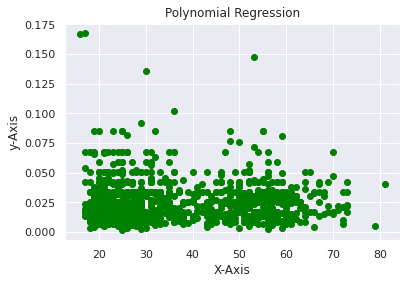

In [25]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Plot scatter diagram
plt.scatter (X, y, color = 'green')
plt.title ("Polynomial Regression")
plt.xlabel ('X-Axis')
plt.ylabel ('y-Axis')

**Implementing regression analysis**

Text(0, 0.5, 'y-Axis')

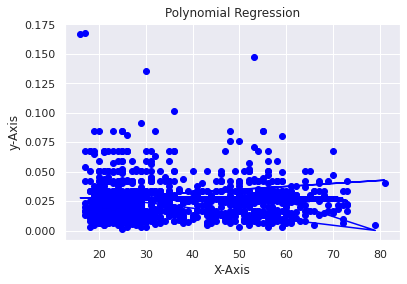

In [26]:
# import libaries
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Apply Polynomial Features
polynomial_reg = PolynomialFeatures (degree = 15)
X_polynomial = polynomial_reg.fit_transform (X)

# Apply Linear Regression Model
linear_reg = LinearRegression ()
linear_reg.fit (X_polynomial, y)
predictions = linear_reg.predict (X_polynomial)

# Plot the results
plt.scatter (X, y, color = 'blue')
plt.plot (X, predictions, color = 'blue')
plt.title ("Polynomial Regression")
plt.xlabel ('X-Axis')
plt.ylabel ('y-Axis')

**Check the model with DummyRegressor**

In [27]:
from sklearn.dummy import DummyRegressor
dr = DummyRegressor ()
dr.fit (X_train, y_train)
dr.score (X_test, y_test)

-0.00011312782360684004

In [28]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression ()
lr.fit (X_train, y_train)
lr.score (X_test, y_test)

0.001180864649532043

In [29]:
lr.coef_

array([-1.54556062e-05])

**Create a Naive Bayes model**

In [32]:
# split the datasets in two parts: feature set and target label
feature_set = ['age_std_scaler', 'ACTIVE', 'PRE-CREATE', 'Monthly', 'Regularly']
features = dataC [feature_set]
target = dataC.age

# partition data into training and training set
from sklearn.model_selection import train_test_split

feature_train, feature_test, target_train, target_test = \
train_test_split (features, target, test_size=0.3, random_state = 1)

# Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Classifier
model = GaussianNB ()

# Train the model using the training sets
model.fit (feature_train, target_train)

# Forecast the target variable for given test dataset
predictions = model.predict (feature_test)

**Evaluate the model performance**

In [37]:
# Import metrics modeule for performance evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Calculate model accuracy
print ("Accuracy:", accuracy_score (target_test, predictions))

Accuracy: 0.9866666666666667
